# .traj to .cif with energies and choosen lattice paramters

Frame 0: Energy = 7.8680 eV
Frame 1: Energy = 7.8759 eV
Frame 2: Energy = 7.8767 eV
Frame 3: Energy = 7.8793 eV
Frame 4: Energy = 7.8812 eV
Frame 5: Energy = 7.8819 eV
Frame 6: Energy = 7.8821 eV
Frame 7: Energy = 7.8825 eV
Frame 8: Energy = 7.8827 eV
Frame 9: Energy = 7.8848 eV
Frame 10: Energy = 7.8855 eV
Frame 11: Energy = 7.8860 eV
Frame 12: Energy = 7.8860 eV
Frame 13: Energy = 7.8861 eV
Frame 14: Energy = 7.8871 eV
Frame 15: Energy = 7.8882 eV
Frame 16: Energy = 7.8898 eV
Frame 17: Energy = 7.8898 eV
Frame 18: Energy = 7.8900 eV
Frame 19: Energy = 7.8902 eV
Frame 20: Energy = 7.8911 eV
Frame 21: Energy = 7.8915 eV
Frame 22: Energy = 7.8917 eV
Frame 23: Energy = 7.8924 eV
Frame 24: Energy = 7.8939 eV


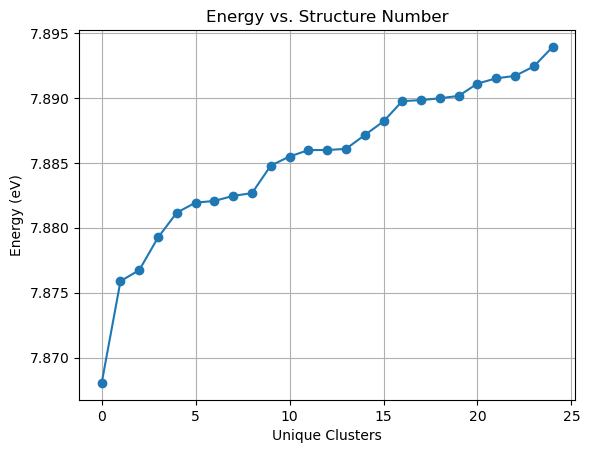

In [1]:
from ase.io import read, write
from ase.calculators.emt import EMT
import matplotlib.pyplot as plt
import os

# Define the desired directory to save the energies.txt file and .cif files
output_directory = '../result_Pd3Ag3Ni3Au3/PdAgNiAu-unique_low_images-cif'  # Replace with your desired directory

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)


##### Read the trajectory file



traj = read('../result_Pd3Ag3Ni3Au3/unique_low_images.traj', index=':')

# Initialize lists to store frame numbers and corresponding energies
frame_numbers = []
energies = []

# Open a file to save the energy values in the desired directory
with open(os.path.join(output_directory, 'energies.txt'), 'w') as f:
    f.write("Frame Number\tEnergy (eV)\n")

    # Loop through each frame in the trajectory
    for i, atoms in enumerate(traj):
        # Set the EMT calculator for the current frame
        atoms.calc = EMT()
        
        # Calculate the potential energy of the current frame
        energy = atoms.get_potential_energy()
        
        # Append the frame number and energy to the lists
        frame_numbers.append(i)
        energies.append(energy)
        
       
       
        # Adjust the cell size if necessary (example: setting a cubic cell of size 10 Å)
        atoms.set_cell([30, 30, 30])  # Adjust these values based on your desired cell size
        atoms.wrap()  # Wrap atoms into the unit cell
        
        # Write the current frame as a .cif file in the desired directory
        write(os.path.join(output_directory, f'Structure_{i}.cif'), atoms, format='cif')
        
        # Print the frame number and energy
        print(f'Frame {i}: Energy = {energy:.4f} eV')
        
        # Save the frame number and energy to the file
        f.write(f"{i}\t{energy:.4f}\n")

# Plot the energy values
plt.plot(frame_numbers, energies, marker='o')
plt.xlabel('Unique Clusters')
plt.ylabel('Energy (eV)')
plt.title('Energy vs. Structure Number')
plt.grid(True)
plt.show()